In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**TASK 1**

Prediction Using Supervised Machine Learning
Level - Intermediate


*   Creating Decision Tree classifier and visualize it graphically.
*   The purpose is if we feed any data to this classifier, it would be able to predict the right class accordingly.


*   Dataset : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv.

**Supervised Learning**

Supervised learning is the machine learning tast of learning a function that maps an input to an output based on example input-output pairs. it infrs a function from labled training data consisting of a set traing examples.

**Regrssion**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

**Simple Linear Regression**

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables.

Simple linear regression uses two variables where one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome.

**Task**

To Predict the percentage of an student based on the number of study hours using supervised and simple linear regression method.






**Importing The Required Libraries**

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [5]:
## to read the data from the given link

data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("The data has been loaded")
print("The shape of the dataframe is =",data.shape)
data.head()

The data has been loaded
The shape of the dataframe is = (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**From the Data imported we can observe that the data shape is of 25 Rows and 2 Columns.
Lets see What are the colums that are present in the dataset** 

In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

the columns consist of Hours of study of the students and their respective score

**Displaying the columns and their very basic information using data.info()**

Here the data.info() shows the information about the given dataset including the index datatype and column datatype, non-null values and memory usage.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the Relation between the Hours and scores Using the Scatterplot**

Text(0.5, 1.0, 'scatter plot - Hours of study vs Score')

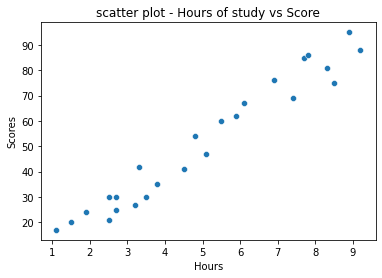

In [8]:

sns.scatterplot(x=data.Hours,y=data.Scores,data=data).set_title("scatter plot - Hours of study vs Score")

Text(0.5, 1.0, 'reg plot Hours of study vs Score')

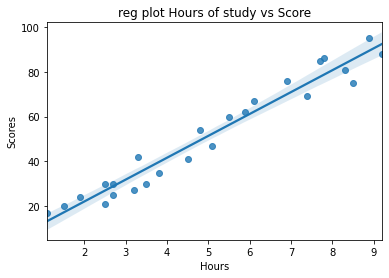

In [9]:

sns.regplot(x=data.Hours,y=data.Scores,data=data).set_title("reg plot Hours of study vs Score")

We can observe from the plot that there is a linear relation between the Hours of study and Score 

**describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the series or DataFrame**

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Finding the Correlation Between Hours of Study and Score**

In [11]:
(data['Hours']).corr(data['Scores'])

0.9761906560220887

The correlation Between the two columns is almost equal to what is Described as highly correlated

**Train the Model**

In [12]:

# considering the hours to be as the independent variable and scores as the dependent variable

#Independent variable X 
X = data['Hours'].to_numpy().reshape(-1,1)

# dependent variable y
y =data['Scores'].to_numpy().reshape(-1,1)

In [13]:

# Using the 'scikit-learn' library, we will be spliting the data to train and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

**Now the data is divided into the train and the test which makes it possible to go further to develop the model using regression fit scikit-learn**

In [15]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [16]:
print("intercept =",reg.intercept_,"coeff is =",reg.coef_)

intercept = [2.69128676] coeff is = [[9.78385439]]


In [17]:
print("intercept =",reg.intercept_,"coeff is =",reg.coef_)

intercept = [2.69128676] coeff is = [[9.78385439]]


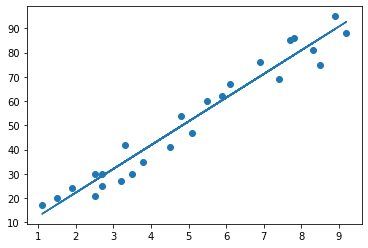

In [18]:
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predicting on The DATASET**

In [20]:
yhat = reg.predict(X_test)
print("prediction",yhat)
print("actual",y_test)

prediction [[83.89727817]
 [27.15092273]
 [27.15092273]]
actual [[81]
 [30]
 [21]]


**Once the Prection is done Lets verify the accuracy of the model**

In [21]:

reg.score(X_test,y_test)

0.974047128713709

As we can see here the accuracy obtained is around 97.40% which is approximately **97%**

**Lets Predict score if a student studies for 9 Hours** 

In [22]:
hours = np.array([9]).reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9]]
Predicted Score = [90.74597624]


**Lets Predict score if a student studies for 6 Hours** 

In [23]:
hours = np.array([6]).reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[6]]
Predicted Score = [61.39441308]


**Model Evaluation**

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("the RMS value is ",mean_squared_error(y_test, yhat))
print("the RMSE value is",mean_squared_error(y_test, yhat, squared=False))
print("the R2 eroor is ",r2_score(y_test, yhat))

the RMS value is  18.1151041578311
the RMSE value is 4.256184225081323
the R2 eroor is  0.974047128713709


**Conclusion**

Here we have obtained the accuracy of **97%** 
